The overall aim of the data [PROBITsim is a simulated dataset from (Goetghebeur et al. 2020) inspired by the Promotion of Breastfeeding Intervention Trial (PROBIT) (Kramer et al, 2001)] is to predict the wight of the children based on some information collected on the mothers and the gender of the child.

The steps are as follows:
1. Check the data for missing values
2. Find outliers and normalize or scale it as needed
3. Try out regression algorithms and observe their prediction accuracies
4. Use hyperparamter tuning to further improve their performances

In [2]:
## import the basic modules in python
import numpy as numpy
import pandas as pd
import random as rd

In [3]:
## data downloaded from https://github.com/sib-swiss/intro-machine-learning-training/blob/main/extra_practice/breastfeeding_data.csv
bf_df=pd.read_csv('/Users/subasrees/Desktop/Machine_learning_practice/breastfeeding_data.csv')
bf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8667 non-null   float64
 1   consult     8667 non-null   object 
 2   breastfeed  8667 non-null   object 
 3   location    8667 non-null   object 
 4   age         8667 non-null   int64  
 5   educ        8667 non-null   object 
 6   smoke       8667 non-null   object 
 7   cesarean    8667 non-null   object 
 8   sex         8667 non-null   object 
 9   allergy     8667 non-null   object 
 10  wgt_gain_3  8667 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 744.9+ KB


In [4]:
## prin features
print(bf_df.columns)

Index(['id', 'consult', 'breastfeed', 'location', 'age', 'educ', 'smoke',
       'cesarean', 'sex', 'allergy', 'wgt_gain_3'],
      dtype='object')


In [5]:
## missing values  - nil
bf_df.isna().sum().sort_values(ascending=False)

id            0
consult       0
breastfeed    0
location      0
age           0
educ          0
smoke         0
cesarean      0
sex           0
allergy       0
wgt_gain_3    0
dtype: int64

The data looks clean, does not require any imputation

In [6]:
## data types of features for data imputation
for i in bf_df.columns:
    print(f"{i}:{bf_df[i].dtype}")

id:float64
consult:object
breastfeed:object
location:object
age:int64
educ:object
smoke:object
cesarean:object
sex:object
allergy:object
wgt_gain_3:int64


<Axes: ylabel='age'>

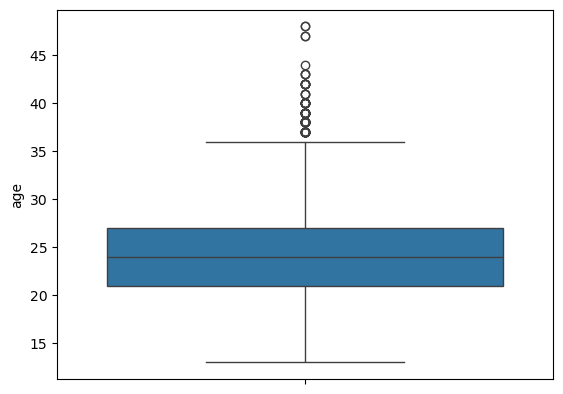

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(bf_df['age'])

The outliers can be removed from the dataframe

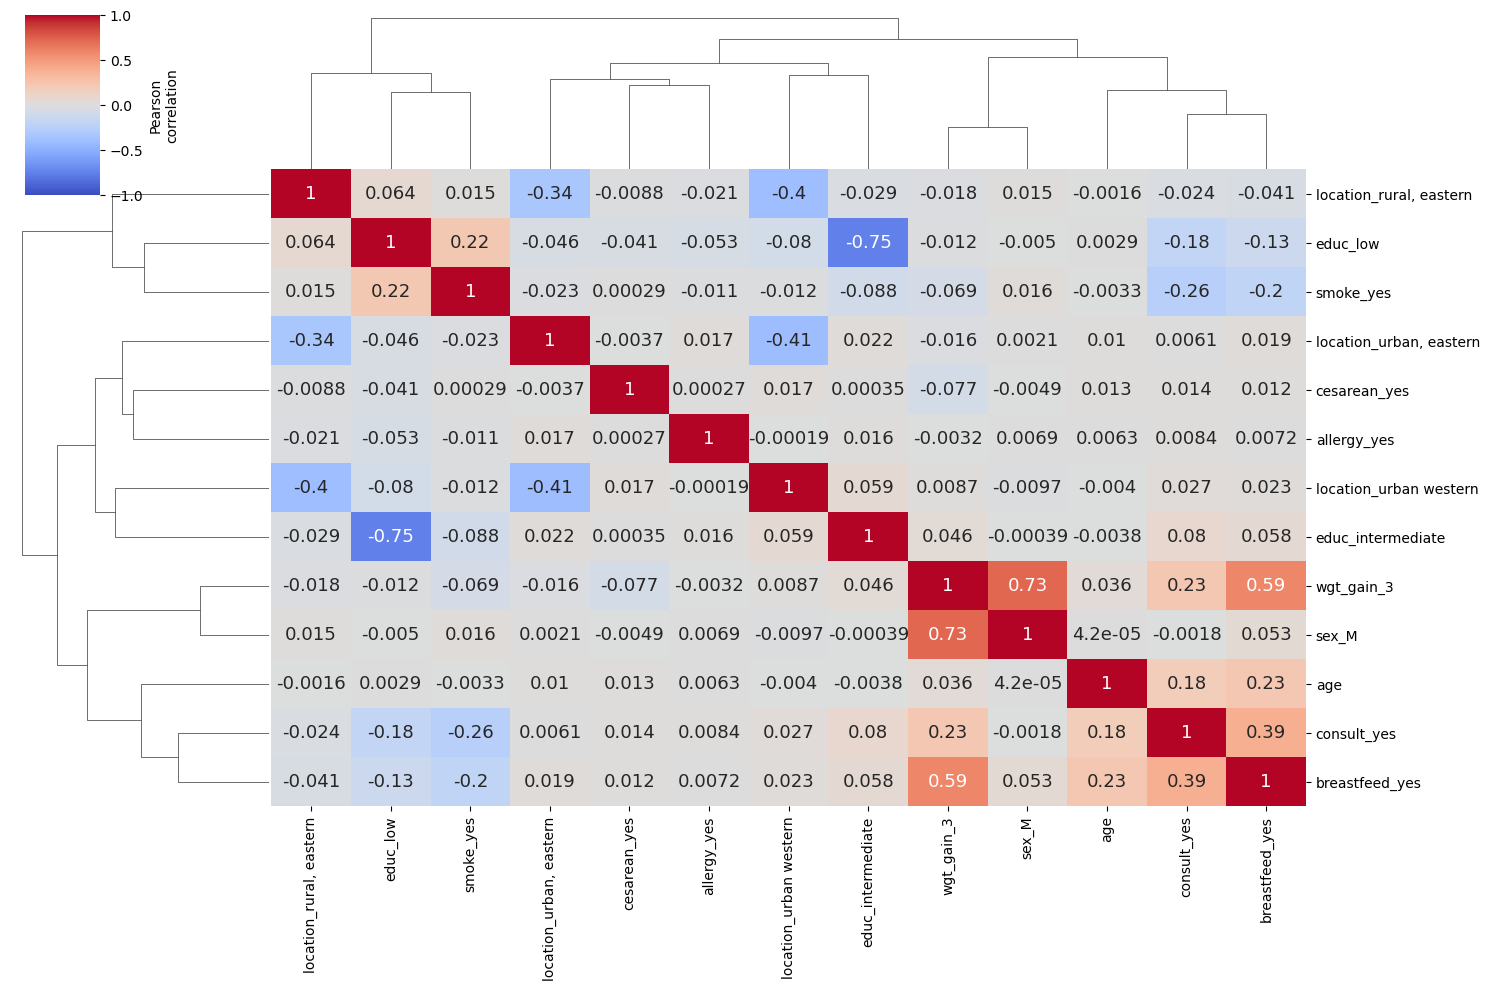

In [28]:
bf_corr=pd.get_dummies( bf_df.iloc[:,1:len(bf_df.columns)] , drop_first=True )
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = bf_corr.corr()

sns.clustermap(df_corr,
               figsize=(15,10),
               z_score=None,
               row_cluster=True,
               col_cluster=True,
               method='ward',
               cmap='coolwarm',vmax=1,vmin=-1, 
               annot=True, annot_kws={"size": 13},cbar_kws={"label": 'Pearson\ncorrelation'})
## sns allows you to do a hierarchical clustering that simply
plt.show()

Weight gain is found to be correlated with sex of the child and breast feeding. There are no other coorelations between the features.

In [29]:
## remove the minor outliers found from the box plot
bf_df=bf_df[bf_df['age']<35]

In [8]:
## create a feature and a target dataframe
bf_features=bf_df.iloc[:,1:len(bf_df.columns)-1]
bf_target=bf_df['wgt_gain_3']

In [9]:
# get dummies will transform these categorical columns to sets of 0/1 columns
df = pd.get_dummies( bf_features , drop_first=True )
df.head()

,age,consult_yes,breastfeed_yes,"location_rural, eastern",location_urban western,"location_urban, eastern",educ_intermediate,educ_low,smoke_yes,cesarean_yes,sex_M,allergy_yes
0,26,False,False,False,True,False,True,False,False,False,False,False
1,26,False,False,False,False,True,True,False,True,True,False,False
2,21,False,True,False,False,True,False,True,False,False,False,False
3,26,False,False,False,False,False,False,False,True,False,True,True
4,28,False,False,False,True,False,True,False,True,True,False,False


In [10]:
target=bf_target
target.head()

0    2528
1    2478
2    3098
3    3095
4    2406
Name: wgt_gain_3, dtype: int64

8667

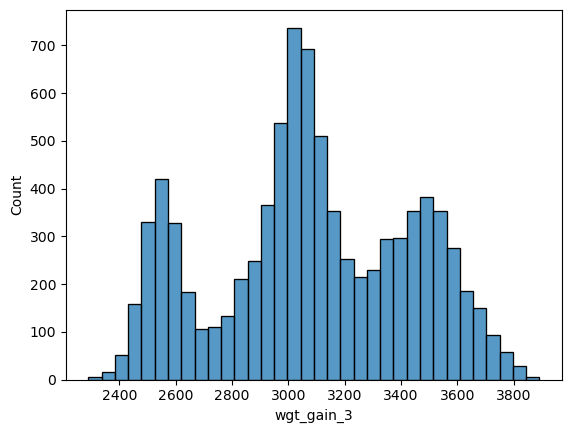

In [11]:
sns.histplot(target)
len(target)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


In [13]:
from sklearn.model_selection import train_test_split

SEED = 2023

#split your data

X_train, X_test, y_train, y_test = train_test_split( df , target,random_state= SEED)
# stratify is here to make sure that you split keeping the repartition of labels unaffected
# by default, the data is split such that 75% is in the train set and 25% in the test set 
print('train set size' , len(y_train))
print('test set size' , len(y_test))

train set size 6500
test set size 2167


In [36]:
models=[]
models.append(('KNN',KNeighborsRegressor()))
models.append(('Linear regression',LinearRegression()))
models.append(('Decision trees',DecisionTreeRegressor()))
models.append(('Random Forest',RandomForestRegressor()))
models.append(('SVM',SVR()))
models.append(('Gradient Boost',GradientBoostingRegressor()))

In [37]:
## evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
for name, model in models:
    print(name,model)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("MSE:",mean_squared_error(y_test,y_pred))
    print('R2:',r2_score(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print()

KNN KNeighborsRegressor()
MSE: 26211.986205589765
R2: 0.7755684505747145
MAE: 117.14258645191852

Linear regression LinearRegression()
MSE: 15775.194990351665
R2: 0.8649300580886305
MAE: 90.95003174368742

Decision trees DecisionTreeRegressor()
MSE: 22171.977348741755
R2: 0.8101597036114995
MAE: 97.09057265588581

Random Forest RandomForestRegressor()
MSE: 18005.07191191275
R2: 0.8458374670652568
MAE: 89.83590524454141

SVM SVR()
MSE: 115294.86396513568
R2: 0.012825477721529865
MAE: 270.49215541803386

Gradient Boost GradientBoostingRegressor()
MSE: 14257.159329543829
R2: 0.8779277413914428
MAE: 82.37736958247925



Lets try to scale the features before deploying a model to see whether they are improving the performance of the model

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [42]:
from sklearn.inspection import permutation_importance
for name, model in models:
    r = permutation_importance(model, X_test_scaled, y_test,
                            n_repeats=30,
                            random_state=0)
    print(model)
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{df.columns[i]:<8}"
                f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")
    print()

KNeighborsRegressor()
sex_M   0.966 +/- 0.022
breastfeed_yes0.677 +/- 0.015
educ_low0.052 +/- 0.004
educ_intermediate0.026 +/- 0.003
cesarean_yes0.020 +/- 0.004
smoke_yes0.018 +/- 0.003
age     0.016 +/- 0.003
location_urban western0.006 +/- 0.003

LinearRegression()
sex_M   0.997 +/- 0.022
breastfeed_yes0.679 +/- 0.013
educ_low0.067 +/- 0.003
educ_intermediate0.041 +/- 0.003
age     0.019 +/- 0.002
cesarean_yes0.011 +/- 0.001
consult_yes0.006 +/- 0.001
location_urban, eastern0.004 +/- 0.001
location_rural, eastern0.004 +/- 0.001
location_urban western0.002 +/- 0.001
smoke_yes0.001 +/- 0.000

DecisionTreeRegressor()
sex_M   1.006 +/- 0.025
breastfeed_yes0.701 +/- 0.015
educ_low0.057 +/- 0.006
educ_intermediate0.026 +/- 0.004
age     0.015 +/- 0.006
smoke_yes0.012 +/- 0.006
cesarean_yes0.012 +/- 0.005

RandomForestRegressor()
sex_M   1.004 +/- 0.024
breastfeed_yes0.695 +/- 0.014
educ_low0.051 +/- 0.004
educ_intermediate0.027 +/- 0.002
age     0.019 +/- 0.004
cesarean_yes0.016 +/- 0.003


The top features are the sex of the baby, whether breast fed or not and the education level of the mothers. 

The least important features is the location of the mothers

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from operator import itemgetter
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

## Linear regression
lr=LinearRegression()

pipeline_lr=Pipeline([('scalar',StandardScaler()),
                      ('poly',PolynomialFeatures(include_bias=False)),
                      ('model',lr)])


# define the hyperparameters you want to test with their range to be tested
grid_values = {'poly__degree': np.arange(1,4,1),
               'poly__interaction_only':[False,True]}

# Feed them to GridSearchCV with the right score (R squared)
grid_lr_acc = GridSearchCV(pipeline_lr, param_grid = grid_values, scoring='r2')

grid_lr_acc.fit(X_train_scaled, y_train)

y_decision_fn_scores_acc=grid_lr_acc.score(X_test,y_test)



print(f'Grid best score (r2): {grid_lr_acc.best_score_:.3f}' )
print( 'Grid best parameter (max. r2): ')
for k,v in grid_lr_acc.best_params_.items():
    print( f'\t{k} -> {v}' )

Grid best score (r2): 0.881
Grid best parameter (max. r2): 
	poly__degree -> 2
	poly__interaction_only -> True


In [44]:
lrm = grid_lr_acc.best_estimator_
y_predict = lrm.predict(X_test_scaled)

R2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)

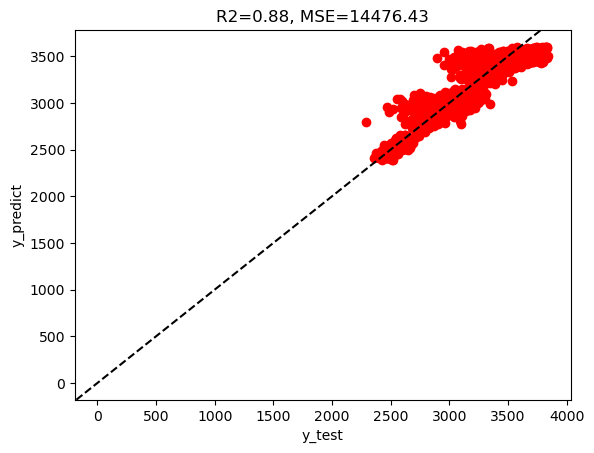

In [45]:
plt.plot(y_test,y_predict,'ro',label='Predicted', linewidth = 3)
plt.title('R2={0:.2f}, MSE={1:.2f}'.format(R2,MSE))
plt.axline((0, 0), slope=1, color="black", linestyle='dashed')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

R2 value for linear model after hyperparameter tuning on the scaled data increased only from 0.86 to 0.88

In [37]:
## SVM
from sklearn.svm import SVR

svr=SVR()

pipeline_svr=Pipeline([('scalar',StandardScaler()),('model',svr)])

from sklearn.model_selection import GridSearchCV

# define the hyperparameters you want to test with their range
# kernel: kernel type to be used in the algorithm (function that takes low dimensional input space 
# and transforms it to a higher dimensional space)
# degree: degree of the polynomial kernel function
# epsilon: parameters that controls which data points contribute to regularization
# C: inverse of regularization strength
grid_values = [{"model": [SVR(kernel='linear')],
                 "model__C":np.logspace(-2, 2, 10)},
                {"model": [SVR(kernel='rbf')],
                 "model__gamma": np.logspace(-2,1,10)},
                {"model": [SVR(kernel='poly')],
                 "model__C":np.logspace(-2, 2, 10),
                 "model__degree":np.arange(2,10,1)}]

# Feed them to GridSearchCV with the right score (R squared)
grid_svr_acc = GridSearchCV(pipeline_svr, param_grid = grid_values, scoring='r2')

grid_svr_acc.fit(X_train_scaled, y_train)

y_decision_fn_scores_acc=grid_svr_acc.score(X_test_scaled,y_test)


print('Grid best parameter (max. r2): ', grid_svr_acc.best_params_)
print('Grid best score (r2): ', grid_svr_acc.best_score_)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)


SVM regressor on the scaled data took over 8 minutes to be executed. The R2 value is ~0.87

In [47]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

# define the hyperparameters you want to test with their range
grid_values = {'learning_rate':np.logspace(-1,0,5),
               'n_estimators':np.arange(25,101,25), 
               'max_depth':[2,3,4],
               'min_samples_split':[10,20],
               'min_samples_leaf':[2,5]}

# Feed them to GridSearchCV with the right score (R squared)
grid_tree = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_values, scoring='r2')

grid_tree.fit(X_train, y_train)

y_decision_fn_scores=grid_tree.score(X_test,y_test)


print('Grid best parameter (max. r2): ', grid_tree.best_params_)
print('Grid best score (r2): ', grid_tree.best_score_)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores)

Grid best parameter (max. r2):  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 75}
Grid best score (r2):  0.881833304216465
Grid best parameter (max. r2) model on test:  0.8777690270674277
CPU times: user 2min 21s, sys: 617 ms, total: 2min 22s
Wall time: 2min 22s


GradientBoostingRegressor took about 2 minutes to be executed. The R2 value has improved from 0.82 to 0.88

RandomForestRegressor took more than 375 minutes to be executed and is deleted from the analysis

In [35]:
models=[pipeline_lr,GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, min_samples_leaf= 5, min_samples_split= 20, n_estimators= 75),SVR(kernel='poly', C= 100.0, degree= 3),KNeighborsRegressor(),RandomForestRegressor()]


In [36]:
from sklearn.model_selection import cross_val_score
for model in models:
    cv_score=cross_val_score(model, df, target, cv=5)
    print(model)
    print(cv_score.mean())
    print()



Pipeline(steps=[('scalar', StandardScaler()),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('model', LinearRegression())])
0.8799597466621666

GradientBoostingRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=20,
                          n_estimators=75)
0.8799583471051987

SVR(C=100.0, kernel='poly')
0.7486071159564449

KNeighborsRegressor()
0.7829265527935918

RandomForestRegressor()
0.8496912902558297

